# Projekt realizowany w ramach przedmiotu Metody Eksploracji Danych, Temat: Analiza Zbioru Danych Aplikacji Z Google Play Store Wraz Ze Stworzeniem Modelu Regresji Oceny i Ceny. 
## Autorzy: Marharyta Kruk, Bartosz Puszkarski

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Wstępna analiza danych

In [2]:
df = pd.read_csv("./dane/googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Analiza cen

In [5]:
df["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [6]:
def price_to_number(price):
    if price in ["0", "Everyone"]:
        return 0
    return float(price[1:])

price_number = df.copy()
price_number["Price"] = df["Price"].apply(price_to_number)
print(sorted(price_number["Price"].unique()))


[0.0, 0.99, 1.0, 1.04, 1.2, 1.26, 1.29, 1.49, 1.5, 1.59, 1.61, 1.7, 1.75, 1.76, 1.96, 1.97, 1.99, 2.0, 2.49, 2.5, 2.56, 2.59, 2.6, 2.9, 2.95, 2.99, 3.02, 3.04, 3.08, 3.28, 3.49, 3.61, 3.88, 3.9, 3.95, 3.99, 4.29, 4.49, 4.59, 4.6, 4.77, 4.8, 4.84, 4.85, 4.99, 5.0, 5.49, 5.99, 6.49, 6.99, 7.49, 7.99, 8.49, 8.99, 9.0, 9.99, 10.0, 10.99, 11.99, 12.99, 13.99, 14.0, 14.99, 15.46, 15.99, 16.99, 17.99, 18.99, 19.4, 19.9, 19.99, 24.99, 25.99, 28.99, 29.99, 30.99, 33.99, 37.99, 39.99, 46.99, 74.99, 79.99, 89.99, 109.99, 154.99, 200.0, 299.99, 379.99, 389.99, 394.99, 399.99, 400.0]


In [7]:
grouped_price = price_number[price_number['Type']=='Paid']

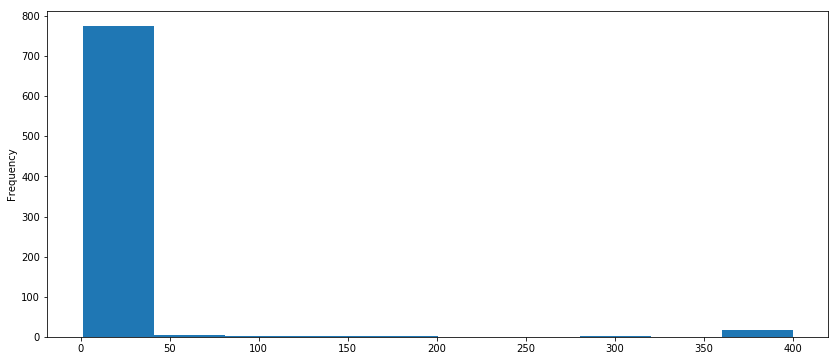

In [8]:
plt.figure(figsize=(14, 6))
grouped_price['Price'].plot.hist()

In [9]:
most_expansive = grouped_price[grouped_price['Price']>370]
most_expansive

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1.5M,100+,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26M,"10,000+",Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,"10,000+",Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1.8M,"100,000+",Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8.7M,"10,000+",Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4.7M,"50,000+",Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2.9M,"1,000+",Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22M,"1,000+",Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965k,"5,000+",Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up
5362,I Am Rich Pro,FAMILY,4.4,201,2.7M,"5,000+",Paid,399.99,Everyone,Entertainment,"May 30, 2017",1.54,1.6 and up


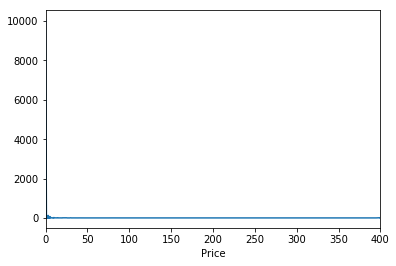

In [10]:
grouped_price = price_number.groupby("Price").count()
grouped_price["App"].index
grouped_price["App"].plot()


Jak widać nie ma za wiele drogich aplikacji

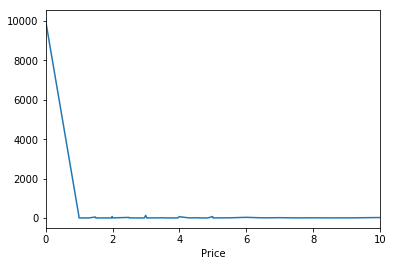

In [11]:
grouped_price.drop([10.99, 11.99, 12.99, 13.99, 14.0, 14.99, 15.46, 15.99, 16.99, 17.99, 18.99, 19.4, 19.9, 19.99, 24.99, 25.99, 28.99, 29.99, 30.99, 33.99, 37.99, 39.99, 46.99, 74.99, 79.99, 89.99, 109.99, 154.99, 200.0, 299.99, 379.99, 389.99, 394.99, 399.99, 400.0])["App"].plot()

In [12]:
total = grouped_price["App"].sum()
less_than_one_and_a_half = grouped_price["App"].loc[0:1.5].sum()
print("Aplikacje o cenie < 1.5 $ stanowią", less_than_one_and_a_half / total, "% całości")

Aplikacje o cenie < 1.5 $ stanowią 0.9448390369892077 % całości


## Analiza ratingu

In [13]:
df["Rating"].describe()

count    9367.000000
mean        4.193338
std         0.537431
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

### Wyrzucamy anomalię

In [14]:
anomaly = df["Rating"] == 19.0
df[anomaly]
df = df.drop(df.index[df["Rating"].idxmax()])

In [15]:
df["Rating"].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

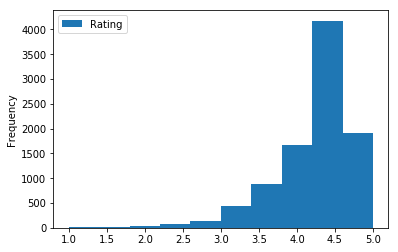

In [16]:
df.plot.hist(by="Rating")

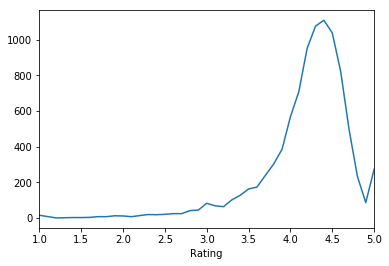

In [17]:
counted_ratings = df.groupby("Rating").count()["App"]
counted_ratings.plot()

In [18]:
wrongs = 0
for i in df["Reviews"].unique():
    try: 
        int(i)
    except ValueError:
        wrongs += 1
        print("Wartość nie jest liczbą: ", i)
        
print("Kolumna zawiera: ", wrongs, " wartości, które nie są liczbami.")

Kolumna zawiera:  0  wartości, które nie są liczbami.


## Installs

In [19]:
df["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

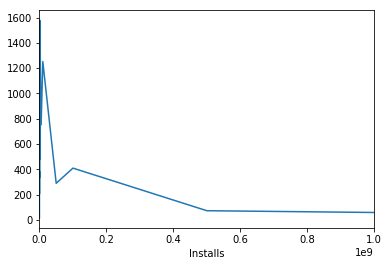

In [20]:
def installs_to_int(install):
    if install in ["0", "0+", "Free"]:
        return 0
    install = install.replace(",", "")[:-1]
    return int(install)


with_installs_as_integers = df.copy()
with_installs_as_integers["Installs"] = df["Installs"].apply(installs_to_int)

counted = with_installs_as_integers.groupby("Installs").count()
counted["App"].plot()

Obcięcie skrajnie największych wartości


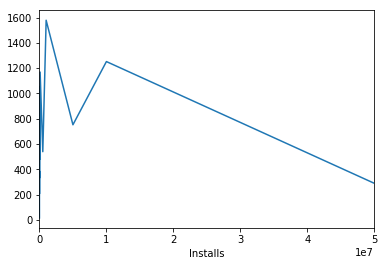

In [21]:
print("Obcięcie skrajnie największych wartości")
counted["App"][:-3].plot()


## Typ aplikacji(płatna/bezpłatna)

In [22]:
df["Type"].unique()

array(['Free', 'Paid', nan], dtype=object)

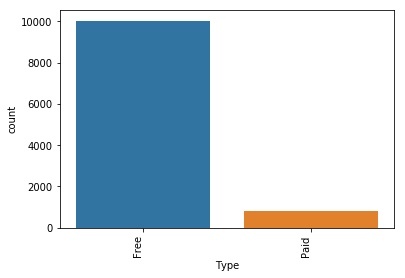

In [23]:
g = sns.countplot(x='Type', data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g

### Większość aplikacji jest bezpłatna

In [24]:
paid = df[df['Type']=='Paid']
free = df[df['Type']=='Free']
paid = paid[['Type', 'Rating']].groupby(by='Type').mean()
free = free[['Type', 'Rating']].groupby(by='Type').mean()
print(f'Średni rating dla płatnych: {paid.iloc[0, 0]} Średni rating dla bezpłatnych: {free.iloc[0, 0]}')

Średni rating dla płatnych: 4.266615146831529 Średni rating dla bezpłatnych: 4.186202546163562


## Wersji

In [25]:
df["Android Ver"].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

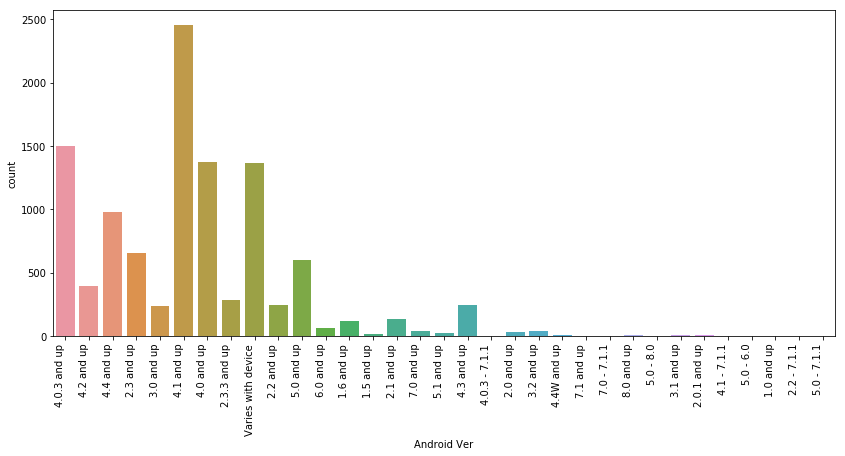

In [26]:
plt.figure(figsize=(14, 6))
g = sns.countplot(x='Android Ver', data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g

Najmniej oceniana: 3.1 and up, najbardziej oceniana: 5.0 - 6.0


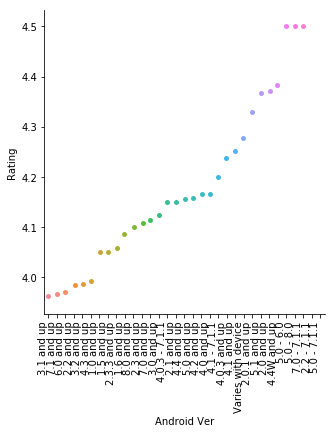

In [27]:
categories = df[['Android Ver', 'Rating']].groupby('Android Ver').mean()
categories_sorted = categories.sort_values(by='Rating')
najm = categories_sorted.idxmin()['Rating']
najw = categories_sorted.idxmax()['Rating']
print(f'Najmniej oceniana: {najm}, najbardziej oceniana: {najw}')
categories_sorted.reset_index(inplace=True)
g = sns.catplot(x='Android Ver', y='Rating', data=categories_sorted)
g.set_xticklabels(rotation=90, ha="right")
g

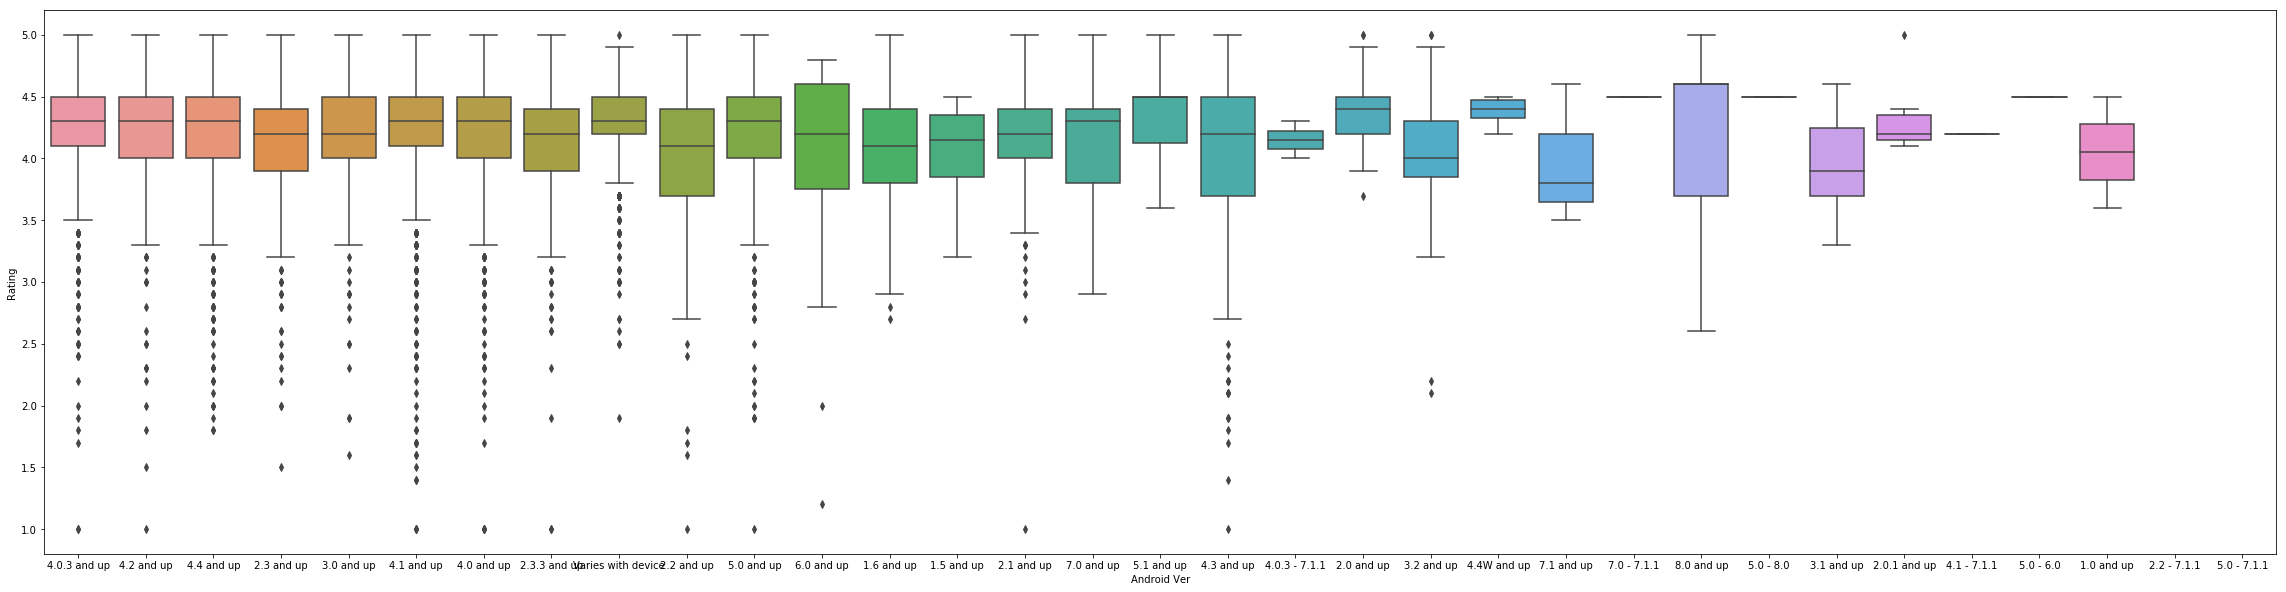

In [28]:
import matplotlib
matplotlib.use('Agg')
plt.figure(figsize=(40,10))
ax = sns.boxplot(x="Android Ver", y="Rating", data=df)

## Rating kontentu

In [29]:
df["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

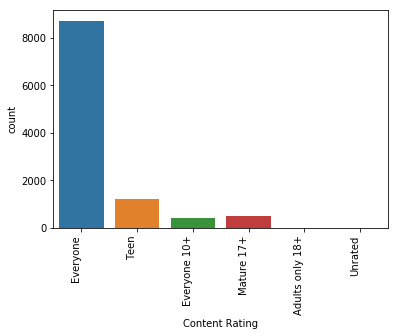

In [30]:
g = sns.countplot(x='Content Rating', data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g

Najmniej oceniania: Unrated, najbardziej oceniania: Adults only 18+


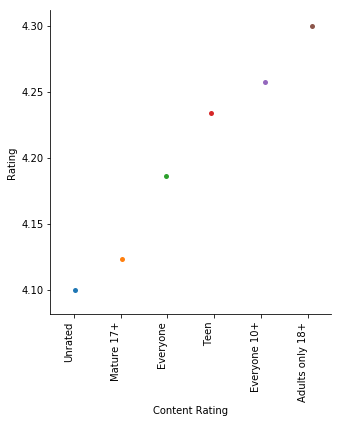

In [31]:
categories = df[['Content Rating', 'Rating']].groupby('Content Rating').mean()
categories_sorted = categories.sort_values(by='Rating')
najm = categories_sorted.idxmin()['Rating']
najw = categories_sorted.idxmax()['Rating']
print(f'Najmniej oceniania: {najm}, najbardziej oceniania: {najw}')
categories_sorted.reset_index(inplace=True)
g = sns.catplot(x='Content Rating', y='Rating', data=categories_sorted)
g.set_xticklabels(rotation=90, ha="right")
g

In [32]:
df[df['Content Rating'] == 'Unrated']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7312,Best CG Photography,FAMILY,NaN,1,2.5M,500+,Free,0,Unrated,Entertainment,"June 24, 2015",5.2,3.0 and up
8266,DC Universe Online Map,TOOLS,4.1,1186,6.4M,"50,000+",Free,0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up


## Rodzaje aplikacji

In [33]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

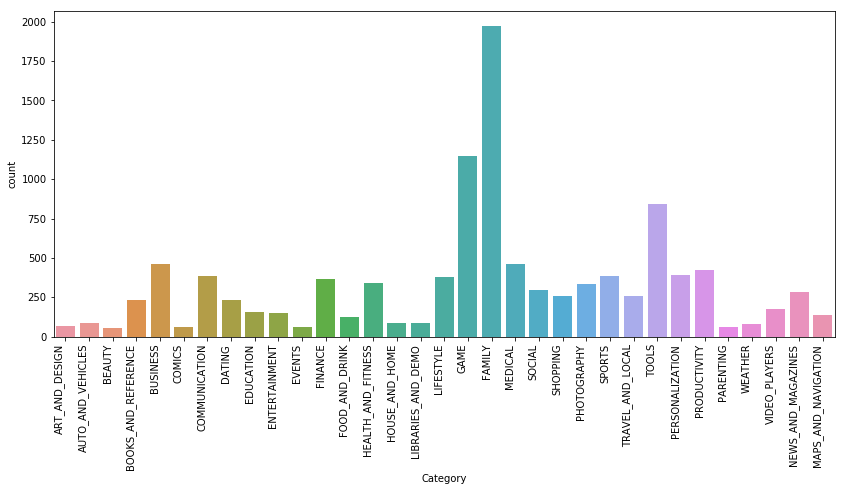

In [34]:
plt.figure(figsize=(14, 6))
g = sns.countplot(x='Category', data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g

Najmniej oceniana: DATING, najbardziej oceniana: EVENTS


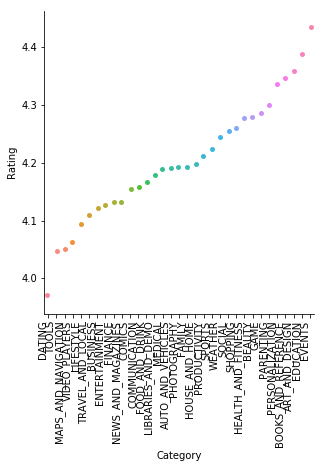

In [35]:
categories = df[['Category', 'Rating']].groupby('Category').mean()
categories_sorted = categories.sort_values(by='Rating')
najm = categories_sorted.idxmin()['Rating']
najw = categories_sorted.idxmax()['Rating']
print(f'Najmniej oceniana: {najm}, najbardziej oceniana: {najw}')
categories_sorted.reset_index(inplace=True)
g = sns.catplot(x='Category', y='Rating', data=categories_sorted)
g.set_xticklabels(rotation=90, ha="right")
g

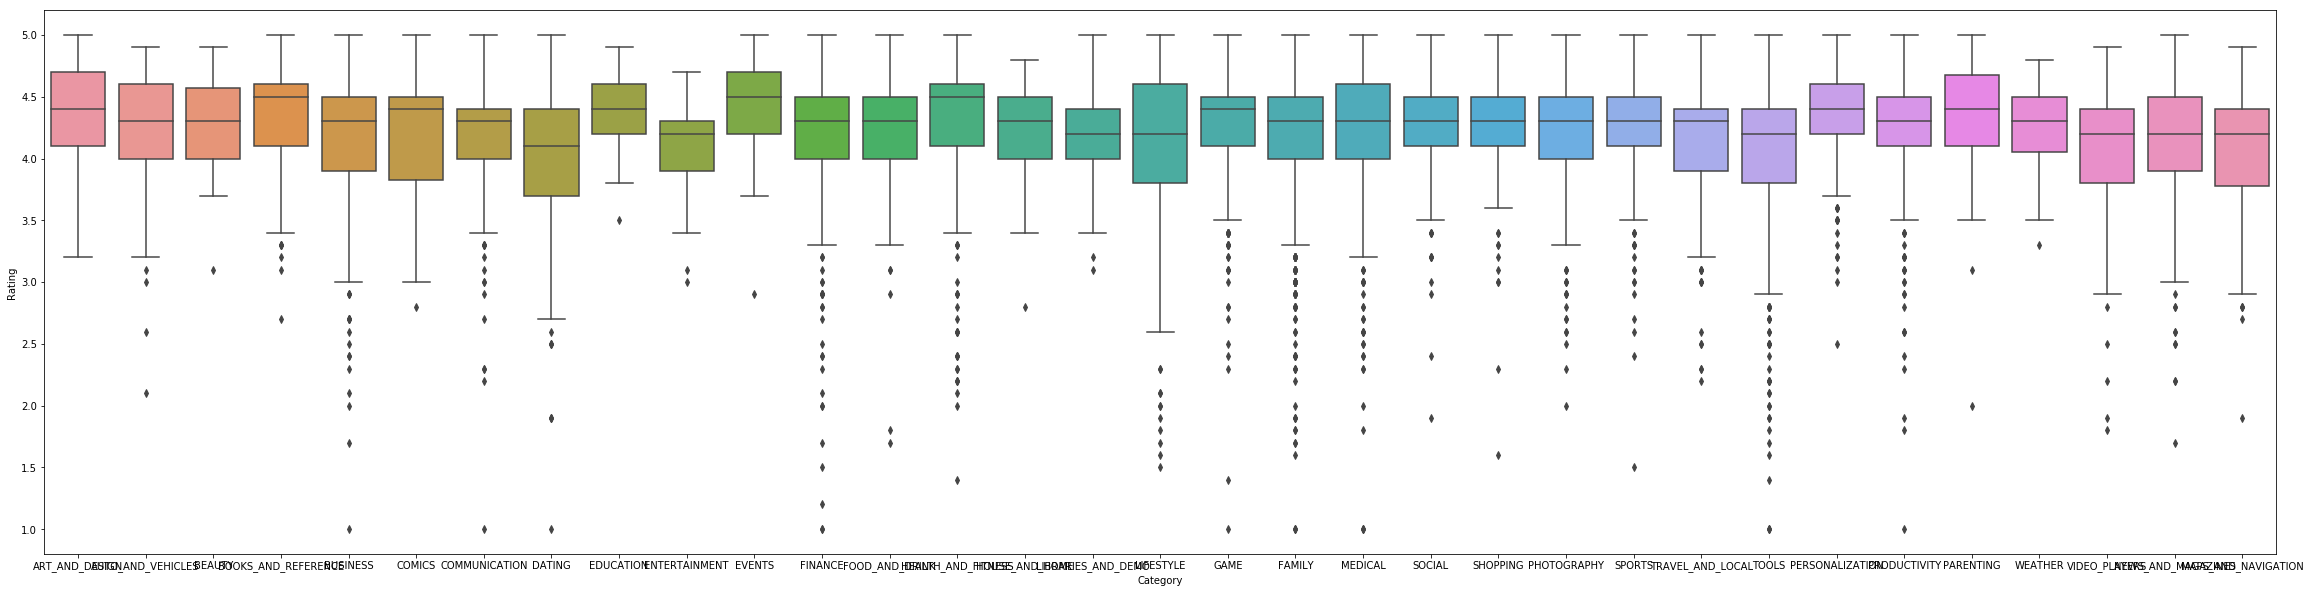

In [36]:
plt.figure(figsize=(40,10))
ax = sns.boxplot(x="Category", y="Rating", data=df)

## Gatunki

In [37]:
df['Genres'].value_counts()

Tools                                  842
Entertainment                          623
Education                              549
Medical                                463
Business                               460
Productivity                           424
Sports                                 398
Personalization                        392
Communication                          387
Lifestyle                              381
Finance                                366
Action                                 365
Health & Fitness                       341
Photography                            335
Social                                 295
News & Magazines                       283
Shopping                               260
Travel & Local                         257
Dating                                 234
Books & Reference                      231
Arcade                                 220
Simulation                             200
Casual                                 193
Video Playe

Chyba można rozbić ostatnie dane po ; i połączyć w większe grupy


## Last updated

Trochę przekształcam dane w taki sposób, aby pokazywały, ile czasu minęło z ostatniego update'u. 

In [38]:
df['Last updated2'] = pd.to_datetime(df['Last Updated'])
print(df['Last updated2'].describe())
df['Last updated2'] = (df['Last updated2'] -  df['Last updated2'].max()).dt.days
df

count                   10840
unique                   1377
top       2018-08-03 00:00:00
freq                      326
first     2010-05-21 00:00:00
last      2018-08-08 00:00:00
Name: Last updated2, dtype: object


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last updated2
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,-213
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,-205
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,-7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,-61
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,-49
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,-500
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,-104
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up,-55
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,-322
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up,-36


## Current ver

In [39]:
df.loc[df["Current Ver"]=="Varies with device"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last updated2
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,-61
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up,-25
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device,-9
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device,-9
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,"5,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device,-9
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,"May 25, 2018",Varies with device,Varies with device,-75
72,"Android Auto - Maps, Media, Messaging & Voice",AUTO_AND_VEHICLES,4.2,271920,16M,"10,000,000+",Free,0,Teen,Auto & Vehicles,"July 11, 2018",Varies with device,5.0 and up,-28
85,CarMax – Cars for Sale: Search Used Car Inventory,AUTO_AND_VEHICLES,4.4,21777,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"August 4, 2018",Varies with device,Varies with device,-4
88,AutoScout24 Switzerland – Find your new car,AUTO_AND_VEHICLES,4.6,13372,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"August 3, 2018",Varies with device,Varies with device,-5
92,Fuelio: Gas log & costs,AUTO_AND_VEHICLES,4.6,65786,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"August 2, 2018",Varies with device,4.0.3 and up,-6


In [40]:
len(df["Current Ver"].unique())

2832

##  Pierwsze wnioski:
- Mamy 9367 niepustych obiektów w interesującej nas kolumnie **Rating**, wartości docelowo powinny wachać się w przedziale 1.0 -5.0, ale znajduje się jedna wartość 19.0.
- Z analizy kwantyli wynika, że ponad **75%** wszystkich istniejących **Ratingów** ma wartość **równą bądź wyższą 4.0**, bezpiecznym jest zatem stwierdzenie, ze możemy zastąpić brakujace wartości wartością równą medianie ( 4.30 )
- Wszystkie rekordy mają wartość w kolumnie **Price**, jest to jednak obecnie napis - zawiera symbol dolara plus wartość liczbową, znajduje się także etykieta Everyone. Wszystkie wartości możemy zastąpić zwykłą wartością liczbową pozbywając sie symbolu waluty, a wartość Everyone zastąpić zerem.
- Wartości w kolumnie **Reviews** są liczbami, z 1 wyjątkiem, który można po prostu zastąpić wartością liczbową 3.0M - 3 000 000 
- Kolumna **Installs** zawiera wartości kategoryczne, nie ciągłe - może zostać zastąpiona wartościami liczbowymi bez większego enkodowania bo jest kategoryczna porządkowa. Co więcej dominują mało popularne aplikacje.
- Kolumna **Type** zawiera jedynie informację czy aplikacja jest płatna, czy darmowa - można zastąpić binarną reprezentacją.
- Kolumna **Size** może być wartością liczbową -> wartości kategoryczne porządkowe. Problem napotykamy z wartościami rozmiaru różnymi dla różnych urżadzeń - warto dobrać wartość nie zmieniającą mediany.
- Kolumna **AndroidVer** może zostać zastąpiona wartością liczbową(flaot z najniższej dopuszczalnej wersji) - trzeba jednak znaleźć największą wartosć nie zmieniającą mediany, którą zastąpimy "Varies with device".
- Kolumna **Genres** jest rozszerzeniem kolumny **Category**, zawierającą dane jakościowe nominalne, co implikuje problem z jednoznacznym enkodowaniem - w pierwszej wersji opracowania danych pozbędziemy się tej kolumny celem zachowania gęstości macierzy dancyh. (Enkodowanie danych jakościowych metodą onehot stworzyło by rzadkie kolumny)
- Kolumna **Last Update** może zostać zastąpiona wynikiem różnicy jej zawartości z aktualną datą, dzięki czemu dostaniemy wartości numeryczne o istotnym znaczeniu (im większa wartość, tym bardziej aktualna jest aplikacja)
- Kolumna **Current Ver** daje nam znikomą ilość informacji przy porównywaniu rekordu z innymi - jest to cecha autonomiczna każdej aplikacji. Jedynie może wskazywać na rozwijalnosć aplikacji - im wyższa wersja tym więcej "unowocześnień" wdrożono. Dodatkowo, posiada ponad 2800 różnych wartości co wyklucza jej sensowne enkodowanie. Wartości są nieciągłe. Kolumnę można usunąć (usunięcie jedynie rekordów nam nie pasujących "Varies with device" powoduje usunięcie prawie 15% danych, co jest znaczącym ubytkiem).
- Kolumny **Current Ver, Size, Android Ver** wykazują zależność dla wartości "Varies with device", gdy znajduje się w jednej kolumnie to zazwyczaj pojawia się też w pozostałych
- Kolumna **App** zawierająca nazwę Aplikacji jest nam zbędna gdyż nie wnosi dodatkowych informacji

## Przygotowanie danych

In [70]:
playstore_df = pd.read_csv("./dane/googleplaystore.csv")

Stworzenie osobnej tablicy z danymi, nie posiadającymi rating

In [71]:
without_rating = df[df.isnull().any(axis=1)]
without_rating.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last updated2
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up,-63
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up,-154
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up,-322
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up,-16
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up,-22


### Zastąpienie niepasujących wartości Ratings medianą

In [72]:
def validate_rating(rating):
    if not 1.0 <= rating <= 5.0:
        return 4.3
    return rating

In [73]:
playstore_df["Rating"] = playstore_df["Rating"].apply(validate_rating)

### Zamiana wartości napisowych na numerychne w kolumnie Price

In [74]:
playstore_df["Price"] = playstore_df["Price"].apply(price_to_number)

### Zmiana wartości kolumny Size na wartości liczbowe

playstore_df['Size'] = playstore_df['Size'].astype(float)

In [82]:
def size_to_number(size):
    if size in "Varies with device":
        return 10
    if size[:-1] == 'M':
        return float(size[:-1])
    elif size[:-1] == 'k':
        return float(size[:-1]) * 0.001
    elif size == '1000+':
        return 1.0
    else:
        size = size.replace(",", ".")
        return float(size[:-1])

Wartość 10 została dobrana eksperymentalnie jako najwyższa niezmieniająca mediany

In [83]:
playstore_df["Size"] = playstore_df["Size"].apply(size_to_number)

In [84]:
playstore_df["Size"].describe()

count    10841.000000
mean        32.805101
std         91.340033
min          1.000000
25%          6.800000
50%         10.000000
75%         28.000000
max       1020.000000
Name: Size, dtype: float64

In [121]:
playstore_df.head()

,Rating,Reviews,Size,Installs,Type,Price,Genres,Last Updated,Android Ver,ART_AND_DESIGN,...,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER,Content_Rating_Ordinal
0,4.1,159,19.0,10000,1.0,0.0,9,-724,4.03,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,3.9,967,14.0,500000,1.0,0.0,12,-716,4.03,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,4.7,87510,8.7,5000000,1.0,0.0,9,-518,4.03,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,4.5,215644,25.0,50000000,1.0,0.0,9,-572,4.20,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,4.3,967,2.8,100000,1.0,0.0,11,-560,4.40,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


### Enkodowanie One-Hot kolumny Type

In [86]:
playstore_df['Type'] = pd.get_dummies(df['Type'])

In [87]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import math

In [88]:
#def validate_type(t):
#    if t!=t or t in '0':
#        return 'Free'
#    return t

In [89]:
#playstore_df["Type"] = playstore_df["Type"].apply(validate_type)

In [90]:
encoder = LabelEncoder()
#type_cat = playstore_df["Type"]
#print(type_cat)
#type_cat_encoded = encoder.fit_transform(type_cat)
#type_cat_encoded

In [91]:
#encoder.classes_

In [92]:
encoder = OneHotEncoder()
#type_cat_1hot = encoder.fit_transform(type_cat_encoded.reshape(-1, 1))
#type_cat_1hot

In [93]:
#type_cat_1hot.toarray()

In [94]:
#playstore_df.drop(["Type"], axis=1,  inplace=True)
#playstore_df[["Free","Paid"]] = pd.DataFrame(type_cat_1hot.toarray())

### Encodowanie Kategorii aplikacji OneHot

In [95]:
encoder_categories = LabelEncoder()
playstore_df = playstore_df.drop(playstore_df.index[10472]) #Wyrzucenie anomalii
categories_cat = playstore_df["Category"]
categories_cat.unique()


array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [96]:
playstore_df[playstore_df['Category']==0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [97]:
categories_cat_encoded = encoder_categories.fit_transform(categories_cat)
categories_cat_encoded

array([ 0,  0,  0, ..., 20,  3, 18])

In [98]:
encoder_hot_categories = OneHotEncoder()
categories_cat_1hot = encoder_hot_categories.fit_transform(categories_cat_encoded.reshape(-1, 1))
categories_cat_1hot

C:\Users\strai\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


<10840x33 sparse matrix of type '<class 'numpy.float64'>'
	with 10840 stored elements in Compressed Sparse Row format>

In [99]:
categories_cat_1hot.toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [100]:
encoder_categories.classes_

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FAMILY',
       'FINANCE', 'FOOD_AND_DRINK', 'GAME', 'HEALTH_AND_FITNESS',
       'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE',
       'MAPS_AND_NAVIGATION', 'MEDICAL', 'NEWS_AND_MAGAZINES',
       'PARENTING', 'PERSONALIZATION', 'PHOTOGRAPHY', 'PRODUCTIVITY',
       'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS', 'TRAVEL_AND_LOCAL',
       'VIDEO_PLAYERS', 'WEATHER'], dtype=object)

In [101]:
playstore_df[encoder_categories.classes_] = pd.DataFrame(categories_cat_1hot.toarray())

In [102]:
playstore_df.drop(["Category"], axis=1, inplace=True)

In [103]:
playstore_df.columns

Index(['App', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING',
       'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FAMILY', 'FINANCE',
       'FOOD_AND_DRINK', 'GAME', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'MAPS_AND_NAVIGATION', 'MEDICAL',
       'NEWS_AND_MAGAZINES', 'PARENTING', 'PERSONALIZATION', 'PHOTOGRAPHY',
       'PRODUCTIVITY', 'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS',
       'TRAVEL_AND_LOCAL', 'VIDEO_PLAYERS', 'WEATHER'],
      dtype='object')

### Content Rating enkodowanie

In [104]:
def validate_content_rating(content):
    if content != content:
        return 'Unrated'
    return content

In [105]:

content_cat = playstore_df["Content Rating"].apply(validate_content_rating)
content_cat.unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [106]:
rating_dict = {
    'Everyone': 0,
    'Everyone 10+': 1,
    'Teen': 2,
    'Mature 17+': 3,
    'Adults only 18+': 4,
    'Unrated': 5
}

playstore_df["Content_Rating_Ordinal"] = playstore_df["Content Rating"].map(rating_dict)

In [107]:
playstore_df.drop(["Content Rating"], axis=1, inplace=True)

### Usunięcie kolumny Genres jako zbędnej

In [108]:
#playstore_df.drop(["Genres"], axis=1, inplace=True)
le = LabelEncoder()
playstore_df['Genres'] = le.fit_transform(playstore_df['Genres'])

### Zastąpienie Last Update wynikiem różnicy dat. 

In [109]:
def transform_to_datetime(date):
    if "." in date:
        date.replace(".", "/")
        date = date[:3] + "1" + date[3:]
    return pd.to_datetime(date)
    

In [110]:
groud_true_date = pd.to_datetime("01/01/2020")
playstore_df["Last Updated"] = playstore_df["Last Updated"].apply(transform_to_datetime)
playstore_df['Last Updated'] = (playstore_df['Last Updated'] - groud_true_date).dt.days

### Installs na numeryczne

In [111]:
playstore_df["Installs"] = playstore_df["Installs"].apply(installs_to_int)

### Transformacja Android Ver na liczbę 

In [112]:
def transform_ver(ver):
    median = 4.03
    if ver!=ver:
        return median
    number = ver[:3]
    if "." in ver[3]:
        number += ver[4]
    try:
        transformed = float(number)
    except ValueError:
        # when ver equals to "Varies with device"
        return median
    return float(transformed)

In [113]:
playstore_df["Android Ver"] = playstore_df["Android Ver"].apply(transform_ver)
playstore_df["Android Ver"].describe()

count    10840.000000
mean         3.891975
std          0.784299
min          1.000000
25%          4.000000
50%          4.030000
75%          4.100000
max          8.000000
Name: Android Ver, dtype: float64

### Usunięcie kolumny Current Ver jako zbędnej 

In [114]:
playstore_df.drop(["Current Ver"], axis=1, inplace=True)

### Usunięcie kolumny App 

In [115]:
playstore_df.drop(["App"], axis=1, inplace=True)

In [116]:
playstore_df.head()

,Rating,Reviews,Size,Installs,Type,Price,Genres,Last Updated,Android Ver,ART_AND_DESIGN,...,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER,Content_Rating_Ordinal
0,4.1,159,19.0,10000,1.0,0.0,9,-724,4.03,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,3.9,967,14.0,500000,1.0,0.0,12,-716,4.03,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,4.7,87510,8.7,5000000,1.0,0.0,9,-518,4.03,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,4.5,215644,25.0,50000000,1.0,0.0,9,-572,4.20,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,4.3,967,2.8,100000,1.0,0.0,11,-560,4.40,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


## Zbadanie korelacji

C:\Users\strai\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


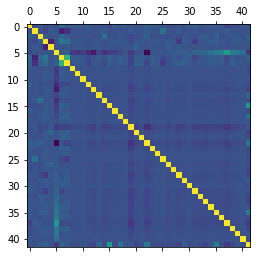

In [117]:
plt.matshow(playstore_df.corr())
plt.show()

##  Modele 

#### to mój komentarz! :
Jakie modele rozwarzamy? mogę wrzucić:
- DecisionTreeRegressor
- SupportVectorRegressor
- Regresja liniowa 

ale co więcej?

### Teza: W danym zbiorze można badać kilka różnych atrubutów, najciekawszymi z których są Rating i Price. Podczas analizy zostało znalezono ponad 1400 aplikacji bez oceny. Naszym celem jest stworzenie dobrego modelu, który będzie w stanie oszacować ocenę dla tych aplikacji. 

In [118]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [120]:
playstore_df.head()

,Rating,Reviews,Size,Installs,Type,Price,Genres,Last Updated,Android Ver,ART_AND_DESIGN,...,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER,Content_Rating_Ordinal
0,4.1,159,19.0,10000,1.0,0.0,9,-724,4.03,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,3.9,967,14.0,500000,1.0,0.0,12,-716,4.03,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,4.7,87510,8.7,5000000,1.0,0.0,9,-518,4.03,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,4.5,215644,25.0,50000000,1.0,0.0,9,-572,4.20,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,4.3,967,2.8,100000,1.0,0.0,11,-560,4.40,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


### Normalizacja

In [122]:
#from sklearn.preprocessing import MinMaxScaler  For normalization

#min_max_scaler = MinMaxScaler() 

data = playstore_df.copy()
data[data.isnull().any(axis=1)]
data = data.drop(data.index[10839])
y = data['Rating'].values
y = y.astype(int)
X = data.drop(columns=['Rating'])
#column_names_to_normalize = ['Reviews', 'Installs']
#x_norm = X[column_names_to_normalize].values
#x_scaled = min_max_scaler.fit_transform(x_norm)
#df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = X.index)
#X[column_names_to_normalize] = df_temp


X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=31)

### Przeprowadzenie regularyzacji Lasso dla badania cech

In [123]:
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print("training score:", train_score) 
print("test score: ", test_score)
print("number of features used: ", coeff_used)

training score: 0.01248362277739501
test score:  0.011704103338733396
number of features used:  3


In [125]:
for feature, coef in zip(list(X.columns), lasso.coef_):
    if coef != 0:
        print(f'Cecha: {feature},      Współczynnik: {coef}')

Cecha: Reviews,      Współczynnik: 5.332282099864709e-09
Cecha: Installs,      Współczynnik: 1.0617533298162598e-10
Cecha: Last Updated,      Współczynnik: 0.00012383344664623462


### Ridge

In [126]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)
train_score=ridge.score(X_train,y_train)
test_score=ridge.score(X_test,y_test)
print("training score:", train_score) 
print("test score: ", test_score)

training score: 0.03600044137651026
test score:  0.029267670491510245


C:\Users\strai\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.70993e-20): result may not be accurate.
  overwrite_a=True).T


In [128]:
cechy = {}
for feature, coef in zip(list(X.columns), ridge.coef_):
    if coef != 0:
        print(f'Cecha: {feature},      Współczynnik: {coef}')
    cechy[coef] = feature
    
sorted_keys = sorted(cechy.keys(), reverse = True)
sorted_vals = [cechy[key] for key in sorted_keys]



Cecha: Reviews,      Współczynnik: 4.2654970886838906e-09
Cecha: Size,      Współczynnik: -1.9423828419307765e-05
Cecha: Installs,      Współczynnik: 1.0508594622119378e-10
Cecha: Type,      Współczynnik: -0.07454049504230092
Cecha: Price,      Współczynnik: -0.0009215042078624049
Cecha: Genres,      Współczynnik: -0.00038202187459198436
Cecha: Last Updated,      Współczynnik: 0.000149370590350305
Cecha: Android Ver,      Współczynnik: -0.00364035530579274
Cecha: ART_AND_DESIGN,      Współczynnik: 0.11480957909872602
Cecha: AUTO_AND_VEHICLES,      Współczynnik: -0.06458431855767321
Cecha: BEAUTY,      Współczynnik: 0.030170102582821556
Cecha: BOOKS_AND_REFERENCE,      Współczynnik: 0.023950841629886175
Cecha: BUSINESS,      Współczynnik: 0.0019865398330007633
Cecha: COMICS,      Współczynnik: -0.13349816482499852
Cecha: COMMUNICATION,      Współczynnik: -0.004906113268469033
Cecha: DATING,      Współczynnik: -0.172964022755212
Cecha: EDUCATION,      Współczynnik: 0.13546372865127798
Ce

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
sc_X=StandardScaler()
X_train1=sc_X.fit_transform(X_train)
X_test1=sc_X.transform(X_test)
y_train1 = y_train.astype('int')
y_test1 = y_test.astype('int')

lr_c=LogisticRegression(random_state=0)
lr_c.fit(X_train1,y_train1)
lr_pred=lr_c.predict(X_test1)

lr_cm=confusion_matrix(y_test1,lr_pred)
lr_ac=accuracy_score(y_test1, lr_pred)
print('LogisticRegression_accuracy:',lr_ac)

C:\Users\strai\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\strai\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\strai\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int32, int64, float64, object were all converted to float64 by StandardScaler.
  import sys
C:\Users\strai\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\strai\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class wil

LogisticRegression_accuracy: 0.7896678966789668


In [130]:
X_train

,Reviews,Size,Installs,Type,Price,Genres,Last Updated,Android Ver,ART_AND_DESIGN,AUTO_AND_VEHICLES,...,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER,Content_Rating_Ordinal
754,11904,1.8,1000000,1.0,0.00,39,-1593,2.30,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6260,3,4.7,100,1.0,0.00,61,-582,4.03,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9972,11,16.0,500,1.0,0.00,39,-795,4.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
400,349384,8.2,10000000,1.0,0.00,36,-526,4.03,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8970,66,8.9,10000,1.0,0.00,81,-1141,2.20,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1346,70769,35.0,5000000,1.0,0.00,62,-526,4.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8927,116,48.0,5000,0.0,4.60,19,-1175,2.30,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4615,48,13.0,1000,1.0,0.00,59,-827,4.20,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5241,8,4.2,1000,1.0,0.00,23,-1169,2.33,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
6768,32,437.0,5000,1.0,0.00,36,-1616,1.60,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


[(10, 0.0829283508601042),
 (20, 0.13300192672005173),
 (30, 0.12629395656207976),
 (40, 0.14769099720531687),
 (50, 0.15287693831101765),
 (60, 0.1322711494075236),
 (70, 0.14779301868739514),
 (80, 0.15378777855801473),
 (90, 0.14873171406053343),
 (100, 0.15217321315415655),
 (110, 0.1475170158446376),
 (120, 0.1605706124610382),
 (130, 0.14828294981414536),
 (140, 0.14874680472965351),
 (150, 0.15810719637243698),
 (160, 0.15564207947777883),
 (170, 0.15361078011010498),
 (180, 0.15165555094589733),
 (190, 0.15376628887883115)]

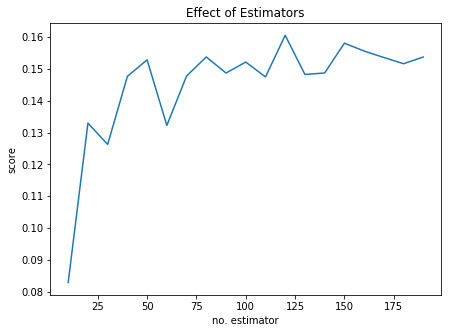

In [131]:
from sklearn.ensemble import RandomForestRegressor
X = playstore_df.drop(columns='Rating')
y = playstore_df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)


model = RandomForestRegressor(n_jobs=-1)
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train1, y_train1)
    scores.append(model.score(X_test1, y_test1))
plt.figure(figsize=(7, 5))
plt.title("Effect of Estimators")
plt.xlabel("no. estimator")
plt.ylabel("score")
plt.plot(estimators, scores)
results = list(zip(estimators,scores))
results